In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
dfi=pd.read_csv('C:/Users/shaha/Desktop/Springboard/Unit24/Datasets/Weather/austin_weather_statistics.csv')

### Data cleaning

In [3]:
dfi.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,12/21/2013,74.0,60.0,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,12/22/2013,56.0,48.0,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,NaN
2,12/23/2013,58.0,45.0,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,NaN
3,12/24/2013,61.0,46.0,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,NaN
4,12/25/2013,58.0,50.0,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,NaN


In [4]:
dfi.shape

(1319, 21)

In [5]:
dfi.dtypes

Date                           object
TempHighF                     float64
TempAvgF                      float64
TempLowF                        int64
DewPointHighF                  object
DewPointAvgF                   object
DewPointLowF                   object
HumidityHighPercent            object
HumidityAvgPercent             object
HumidityLowPercent             object
SeaLevelPressureHighInches     object
SeaLevelPressureAvgInches      object
SeaLevelPressureLowInches      object
VisibilityHighMiles            object
VisibilityAvgMiles             object
VisibilityLowMiles             object
WindHighMPH                    object
WindAvgMPH                     object
WindGustMPH                    object
PrecipitationSumInches         object
Events                         object
dtype: object

In [6]:
#Checking null values
dfi.isnull().sum().sort_values()

Date                            0
WindGustMPH                     0
WindAvgMPH                      0
WindHighMPH                     0
VisibilityLowMiles              0
VisibilityAvgMiles              0
VisibilityHighMiles             0
SeaLevelPressureLowInches       0
SeaLevelPressureAvgInches       0
PrecipitationSumInches          0
SeaLevelPressureHighInches      0
HumidityAvgPercent              0
DewPointLowF                    0
DewPointAvgF                    0
TempLowF                        0
HumidityLowPercent              0
TempAvgF                        2
HumidityHighPercent             4
DewPointHighF                   4
TempHighF                       5
Events                        903
dtype: int64

In [7]:
dfi['Events'].unique()

array(['Rain , Thunderstorm', nan, 'Rain', 'Fog', 'Rain , Snow',
       'Fog , Rain', 'Thunderstorm', 'Fog , Rain , Thunderstorm',
       'Fog , Thunderstorm'], dtype=object)

In [8]:
dfi['Date']=pd.to_datetime(dfi['Date'])

In [9]:
#Replacing null values fo Events column with 'most sunny' and 'prtly cloudy'
event_temp=dfi[(pd.DatetimeIndex(dfi['Date']).month>=12) | (pd.DatetimeIndex(dfi['Date']).month<=2)]
event_temp['Events']=event_temp['Events'].fillna('Partly cloudy')

C:\Users\shaha\AppData\Local\Temp/ipykernel_1036/3365931976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_temp['Events']=event_temp['Events'].fillna('Partly cloudy')


In [10]:
event_temp=event_temp.set_index('Date')
event_temp.head()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
Date,,,,,,,,,,,,,,,,,,,,
2013-12-21,74.0,60.0,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
2013-12-22,56.0,48.0,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0,Partly cloudy
2013-12-23,58.0,45.0,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0,Partly cloudy
2013-12-24,61.0,46.0,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0,Partly cloudy
2013-12-25,58.0,50.0,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T,Partly cloudy


In [11]:
list_temp=event_temp.index
list_temp

DatetimeIndex(['2013-12-21', '2013-12-22', '2013-12-23', '2013-12-24',
               '2013-12-25', '2013-12-26', '2013-12-27', '2013-12-28',
               '2013-12-29', '2013-12-30',
               ...
               '2017-02-19', '2017-02-20', '2017-02-21', '2017-02-22',
               '2017-02-23', '2017-02-24', '2017-02-25', '2017-02-26',
               '2017-02-27', '2017-02-28'],
              dtype='datetime64[ns]', name='Date', length=341, freq=None)

In [12]:
dfi=dfi.set_index('Date')
dfi.head()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
Date,,,,,,,,,,,,,,,,,,,,
2013-12-21,74.0,60.0,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
2013-12-22,56.0,48.0,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0,NaN
2013-12-23,58.0,45.0,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0,NaN
2013-12-24,61.0,46.0,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0,NaN
2013-12-25,58.0,50.0,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T,NaN


In [13]:
list_dfi=dfi.index
list_dfi

DatetimeIndex(['2013-12-21', '2013-12-22', '2013-12-23', '2013-12-24',
               '2013-12-25', '2013-12-26', '2013-12-27', '2013-12-28',
               '2013-12-29', '2013-12-30',
               ...
               '2017-07-22', '2017-07-23', '2017-07-24', '2017-07-25',
               '2017-07-26', '2017-07-27', '2017-07-28', '2017-07-29',
               '2017-07-30', '2017-07-31'],
              dtype='datetime64[ns]', name='Date', length=1319, freq=None)

In [14]:
m=0
for i in list_temp:
    n=0
    for j in list_dfi:
        if i==j: 
            dfi.iloc[n,19]=event_temp.iloc[m,19]
            break
        n+=1
    m+=1

In [15]:
dfi['Events']=dfi['Events'].fillna('Mostly sunny')

In [16]:
#It has been observed the sign of '-' and 'T' are in the data frame. So it should be converted to NaN
dfi=dfi.replace('-',np.nan)
dfi['PrecipitationSumInches']=dfi['PrecipitationSumInches'].replace('T',np.nan)

In [17]:
#Creating a list of columns
list_columns=dfi.columns[3:-1]
list_columns

Index(['DewPointHighF', 'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches'],
      dtype='object')

In [18]:
#Changing data type
dfi[list_columns]=dfi[list_columns].astype('float64')

In [19]:
dfi.dtypes

TempHighF                     float64
TempAvgF                      float64
TempLowF                        int64
DewPointHighF                 float64
DewPointAvgF                  float64
DewPointLowF                  float64
HumidityHighPercent           float64
HumidityAvgPercent            float64
HumidityLowPercent            float64
SeaLevelPressureHighInches    float64
SeaLevelPressureAvgInches     float64
SeaLevelPressureLowInches     float64
VisibilityHighMiles           float64
VisibilityAvgMiles            float64
VisibilityLowMiles            float64
WindHighMPH                   float64
WindAvgMPH                    float64
WindGustMPH                   float64
PrecipitationSumInches        float64
Events                         object
dtype: object

In [20]:
#Now it is essential to check the null values of the new condition
dfi.isnull().sum().sort_values()

Events                          0
TempLowF                        0
TempAvgF                        2
WindAvgMPH                      2
WindHighMPH                     2
HumidityAvgPercent              2
HumidityLowPercent              2
SeaLevelPressureLowInches       3
SeaLevelPressureAvgInches       3
SeaLevelPressureHighInches      3
WindGustMPH                     4
TempHighF                       5
HumidityHighPercent             6
DewPointLowF                    7
DewPointAvgF                    7
DewPointHighF                  11
VisibilityHighMiles            12
VisibilityAvgMiles             12
VisibilityLowMiles             12
PrecipitationSumInches        124
dtype: int64

In [21]:
#Replacing the null values by interpolation
dfi=dfi.interpolate('linear')

In [22]:
#Checking the null values for making sure
dfi.isnull().sum().sort_values()

TempHighF                     0
WindGustMPH                   0
WindAvgMPH                    0
WindHighMPH                   0
VisibilityLowMiles            0
VisibilityAvgMiles            0
VisibilityHighMiles           0
SeaLevelPressureLowInches     0
SeaLevelPressureAvgInches     0
SeaLevelPressureHighInches    0
HumidityLowPercent            0
HumidityAvgPercent            0
HumidityHighPercent           0
DewPointLowF                  0
DewPointAvgF                  0
DewPointHighF                 0
TempLowF                      0
TempAvgF                      0
PrecipitationSumInches        0
Events                        0
dtype: int64

In [23]:
#Clean data
df=dfi
df.head()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
Date,,,,,,,,,,,,,,,,,,,,
2013-12-21,74.0,60.0,45,67.0,49.0,43.0,93.0,75.0,57.0,29.86,29.68,29.59,10.0,7.0,2.0,20.0,4.0,31.0,0.46,"Rain , Thunderstorm"
2013-12-22,56.0,48.0,39,43.0,36.0,28.0,93.0,68.0,43.0,30.41,30.13,29.87,10.0,10.0,5.0,16.0,6.0,25.0,0.00,Partly cloudy
2013-12-23,58.0,45.0,32,31.0,27.0,23.0,76.0,52.0,27.0,30.56,30.49,30.41,10.0,10.0,10.0,8.0,3.0,12.0,0.00,Partly cloudy
2013-12-24,61.0,46.0,31,36.0,28.0,21.0,89.0,56.0,22.0,30.56,30.45,30.30,10.0,10.0,7.0,12.0,4.0,20.0,0.00,Partly cloudy
2013-12-25,58.0,50.0,41,44.0,40.0,36.0,86.0,71.0,56.0,30.41,30.33,30.27,10.0,10.0,7.0,10.0,2.0,16.0,0.00,Partly cloudy


In [ ]:
pd.to_csv('C:/Users/shaha/Desktop/Springboard/Unit24/')

### Data analysis and visualization

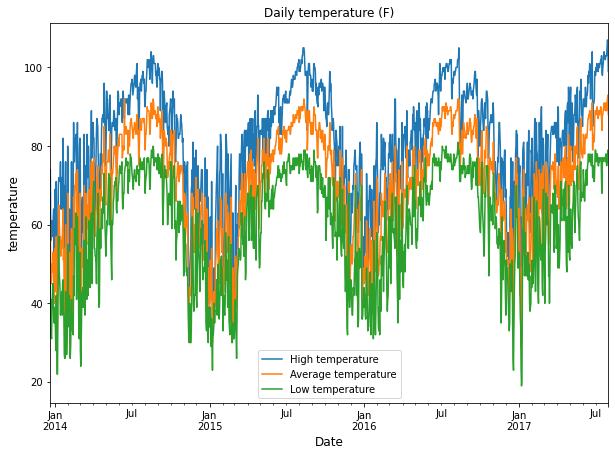

In [40]:
plt.figure(figsize=(10,7))
df['TempHighF'].plot(label='High temperature')
df['TempAvgF'].plot(label='Average temperature')
df['TempLowF'].plot(label='Low temperature')
plt.xlabel('Date', size='large')
plt.ylabel('temperature', size='large')
plt.title('Daily temperature (F)')
plt.legend()
plt.show()

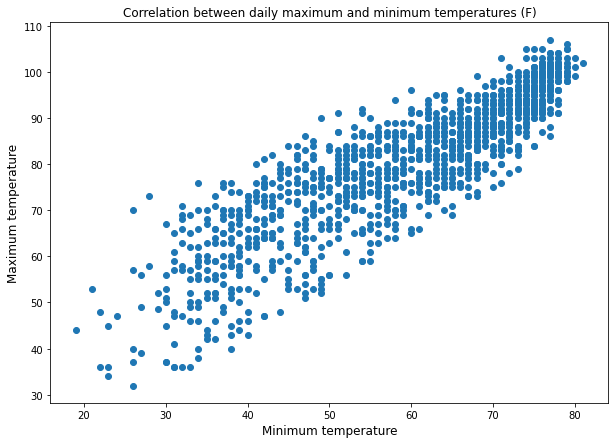

In [42]:
plt.figure(figsize=(10,7))
plt.scatter(df['TempLowF'], df['TempHighF'])
plt.xlabel('Minimum temperature', size='large')
plt.ylabel('Maximum temperature', size='large')
plt.title('Correlation between daily maximum and minimum temperatures (F)')
plt.show()

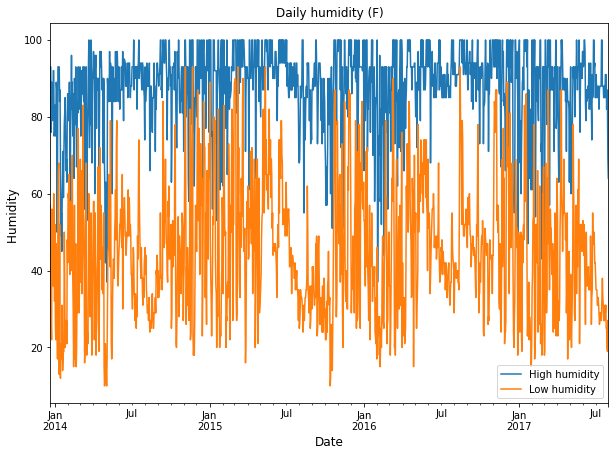

In [46]:
plt.figure(figsize=(10,7))
df['HumidityHighPercent'].plot(label='High humidity')
#df['HumidityAvgPercent'].plot(label='Average humidity')
df['HumidityLowPercent'].plot(label='Low humidity')
plt.xlabel('Date', size='large')
plt.ylabel('Humidity ', size='large')
plt.title('Daily humidity (F)')
plt.legend()
plt.show()

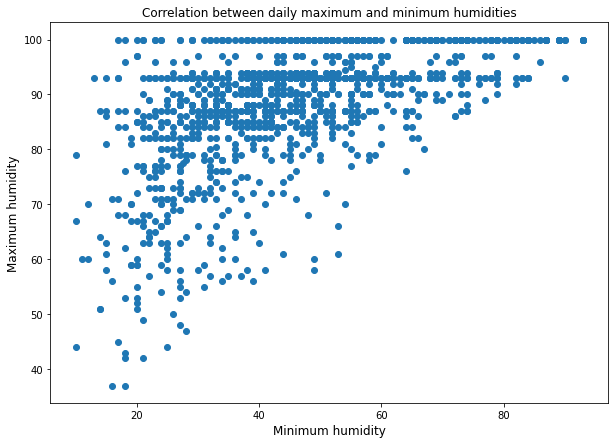

In [48]:
plt.figure(figsize=(10,7))
plt.scatter(df['HumidityLowPercent'], df['HumidityHighPercent'])
plt.xlabel('Minimum humidity', size='large')
plt.ylabel('Maximum humidity', size='large')
plt.title('Correlation between daily maximum and minimum humidities')
plt.show()

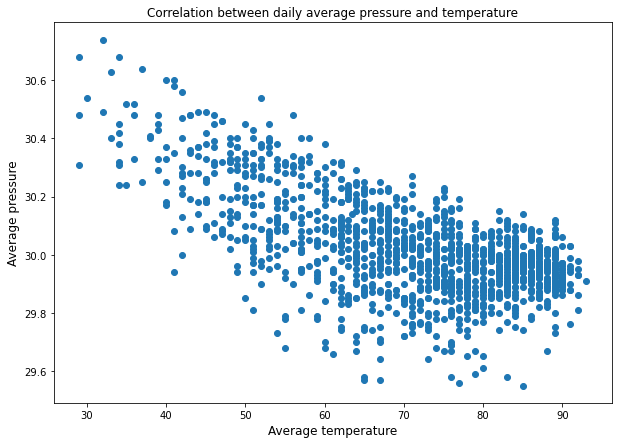

In [49]:
plt.figure(figsize=(10,7))
plt.scatter(df['TempAvgF'], df['SeaLevelPressureAvgInches'])
plt.xlabel('Average temperature', size='large')
plt.ylabel('Average pressure', size='large')
plt.title('Correlation between daily average pressure and temperature')
plt.show()

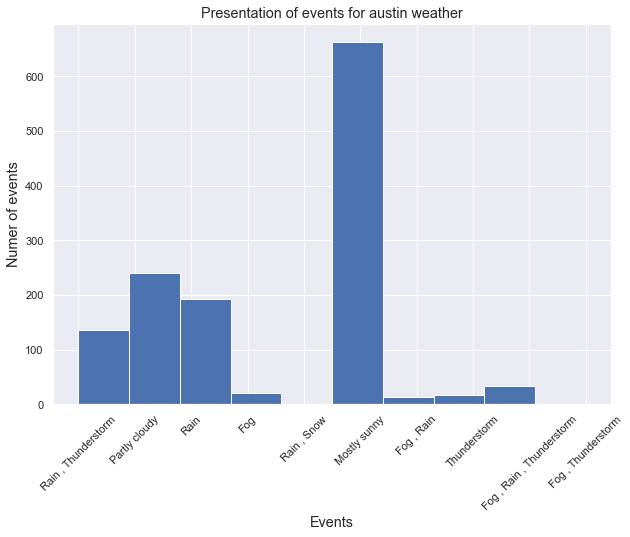

In [53]:
plt.figure(figsize=(10,7))
sns.set()
plt.hist(df['Events'])
plt.xlabel('Events', size='large')
plt.ylabel('Numer of events', size='large')
plt.title('Presentation of events for austin weather', size='large')
plt.xticks(rotation=45)
plt.show()

### Null hypothesis for average temperature and pressure

In [57]:
list_a=df['TempAvgF']; list_b=df['SeaLevelPressureAvgInches']
Diff_observed=np.mean(list_a-list_b)

In [62]:
#Bootstrapping
bs_replicates=[]
for i in range(1000):
    sample_a=np.random.choice(list_a,len(list_a))
    sample_b=np.random.choice(list_b,len(list_b))
    sample_difference=np.mean(sample_a)-np.mean(sample_b)
    bs_replicates.append(sample_difference)
bs_replicates=np.array(bs_replicates)

In [64]:
p=np.sum(bs_replicates>=Diff_observed)/1000
print('P value: ', p)

P value:  0.521


### Linear regression for maximum and minimum temperatures to propose a straight line for correleation analysis

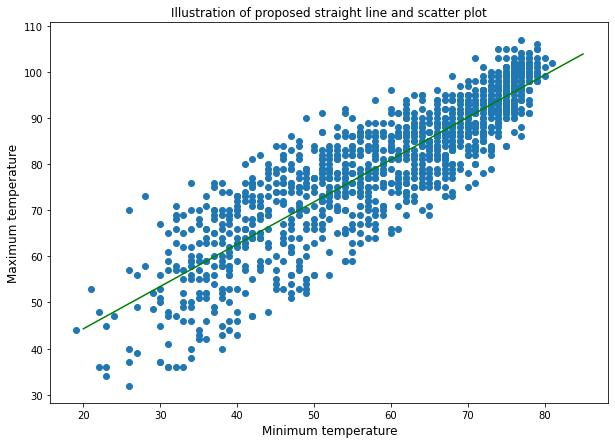

In [65]:
x=df['TempLowF']; y=df['TempHighF']
coefficients=np.polyfit(x,y,1)
slope=coefficients[0]; intercept=coefficients[1]
plt.figure(figsize=(10,7))
plt.scatter(df['TempLowF'], df['TempHighF'])
plt.xlabel('Minimum temperature', size='large')
plt.ylabel('Maximum temperature', size='large')
plt.title('Illustration of proposed straight line and scatter plot', size='large')
plt.plot([20,85],[20*coefficients[0]+coefficients[1],85*coefficients[0]+coefficients[1]],'g-')
plt.show()